# 0. 카메라 스티커앱 만들기

사진에 있는 인물들에 스티커를 붙여보자.

# 1. 사진 준비하기

In [1]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np

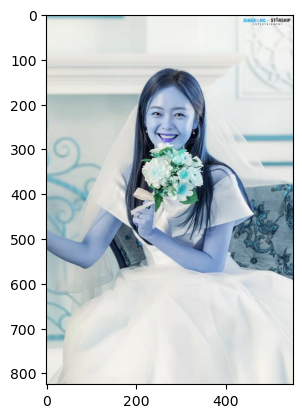

In [2]:
my_image_path = 'data\So-minJeon.webp'
img_bgr = cv2.imread(my_image_path)
img_show_bgr = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

이미지를 보면 피오나 공주 혹은 아바타마냥 마냥 색깔이 이상하게 나오는 걸 볼 수 있는데  
cv2는 기본적으로 이미지를 rgb순이 아닌 gbr순으로 거꾸로 읽어오기 때문에 순서를 reverse해줘야 한다.

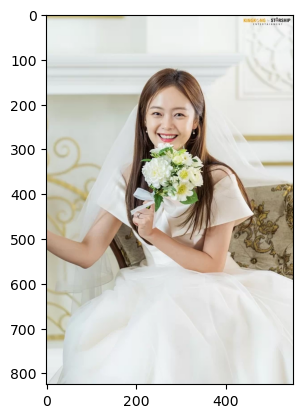

In [3]:
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_basic = img.copy()
img_show =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

원본 사진 그대로 잘 불러온 모습.

# 2. 얼굴 검출하기

In [4]:
detector = dlib.get_frontal_face_detector()

얼굴의 bounding box를 추출해주는 클래스.

In [5]:
rects = detector(img)
print(rects)

rectangles[[(215, 192) (319, 296)]]


bounding box의 좌표값.

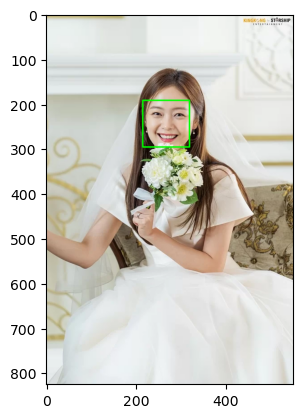

In [6]:
for rect in rects:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

bounding box를 이미지에 그려주었다.

# 3. 랜드마크 검출 하기

In [7]:
model_path = 'data/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model_path)

http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2  
bounding box 속 얼굴의 이목구비 68개를 잡아주는 face landmark localization 기술을 가진 모델을 불러왔다.

In [8]:
landmarks = []

for rect in rects:
    points = predictor(img, rect)
    points = list(map(lambda p: (p.x, p.y), points.parts()))
    landmarks.append(points)

print(len(landmarks[0]))

68


랜드마크 좌표 저장.

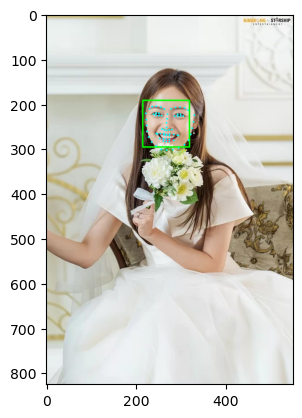

In [9]:
for landmark in landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

plt.imshow(img_show)
plt.show()

랜드마크가 잘 그려진 모습.

# 4. 스티커 적용 위치 확인하기

In [10]:
for rect, landmark in zip(rects, landmarks):
    print(landmark[30])
    w = rect.width()
    h = rect.height() // 2
    x = landmark[30][0]
    y = landmark[30][1]

    print ('(x, y) : (%d, %d)'%(x, y))
    print ('(w, h) : (%d, %d)'%(w, h))

(268, 252)
(x, y) : (268, 252)
(w, h) : (105, 52)


30번째 landmark는 코 좌표인데 우리는 고양이 수염을 코에 붙일 것이기 때문에 딱히 위치를 수정할 필요는 없다.

In [11]:
sticker_path = 'data\\whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(52, 105, 3)


고양이 수염 png 사진을 가져왔다.

In [12]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (216,226)


고양이 그림을 붙일 시작점 지정.  
주의사항으로는 x, y값이 좌하단에서 우상단으로 갈수록 커지는 것이 아닌  
좌상단에서 우하단으로 갈수록 커진다.

In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[: , -refined_x: ]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y: , : ]
    refined_y = 0

print ('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (216, 226)


좌표값이 음수가 나올 시 범위를 벗어나 에러가 뜨므로 벗어난 부분은 삭제해준다.

# 5. 스티커 적용하기

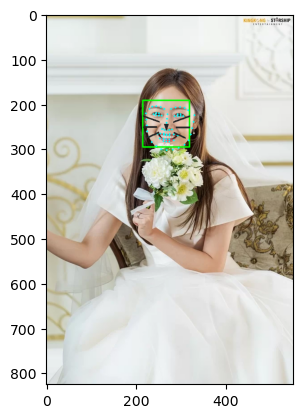

In [14]:
sticker_area = img_show[refined_y: refined_y + img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]]

img_show[refined_y: refined_y + img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show()

고양이 수염이 잘 그려진 모습.

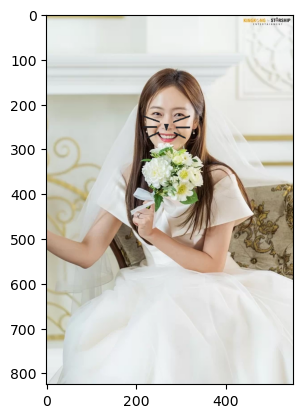

In [15]:
sticker_area = img[refined_y: refined_y + img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]]

img[refined_y: refined_y + img_sticker.shape[0], refined_x: refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area, img_sticker).astype(np.uint8)
    
plt.imshow(img)
plt.show()

원본 사진에 고양이 수염만 그려주었다.

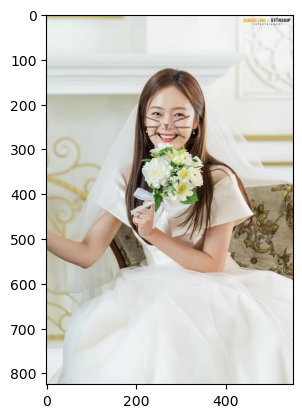

In [16]:
added_img = cv2.addWeighted(img_basic, 0.5, img, 0.5, 0)
plt.imshow(added_img)
plt.show()

고양이 수염을 약간 투명하게 해주었다.

# 6. 문제점 찾아보기

In [17]:
def Sticker(my_image_path):
    img_bgr = cv2.imread(my_image_path)
    img_show_bgr = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_basic = img.copy()
    img_show =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    detector = dlib.get_frontal_face_detector()

    rects = detector(img)
    print(rects)

    for rect in rects:
        l = rect.left()
        t = rect.top()
        r = rect.right()
        b = rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    plt.imshow(img_show)
    plt.show()

    model_path = 'data/shape_predictor_68_face_landmarks.dat'
    predictor = dlib.shape_predictor(model_path)

    landmarks = []

    for rect in rects:
        points = predictor(img, rect)
        points = list(map(lambda p: (p.x, p.y), points.parts()))
        landmarks.append(points)
    print(len(landmarks[0]))

    for landmark in landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
    plt.imshow(img_show)
    plt.show()

    for rect, landmark in zip(rects, landmarks):
        print (landmark[30])
        w = rect.width()
        h = rect.height() // 2
        x = landmark[30][0]
        y = landmark[30][1]
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))

    sticker_path = 'data\\whiskers.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print(img_sticker.shape)

    refined_x = x - w // 2
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0

    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(img_show)
    plt.show()

    sticker_area = img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(img)
    plt.show()

    added_img = cv2.addWeighted(img_basic, 0.5, img, 0.5, 0)
    plt.imshow(added_img)
    plt.show()

## 6.1. 멀리서 찍은 사진

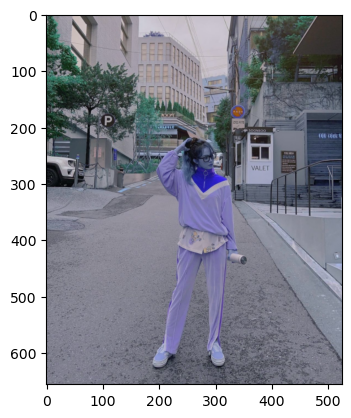

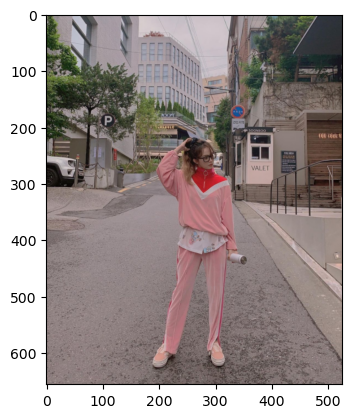

rectangles[]


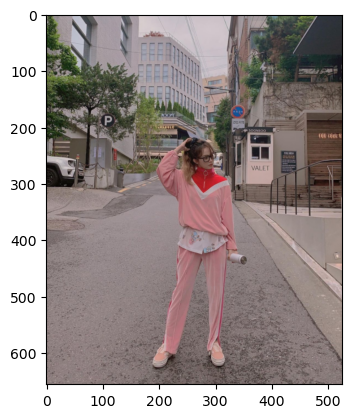

IndexError: list index out of range

In [18]:
my_image_path = 'data\So-minJeon1.png'
Sticker(my_image_path)

인물이 멀리 있는 사진은 얼굴 인식을 잘 못한다.

## 6.2. 어두운 사진

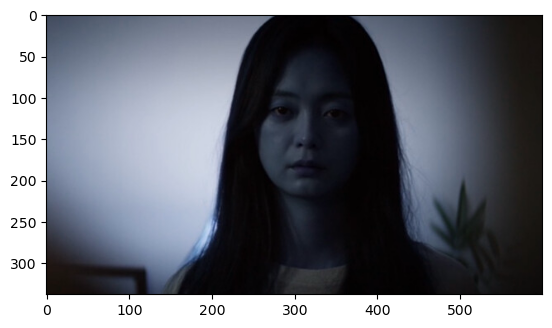

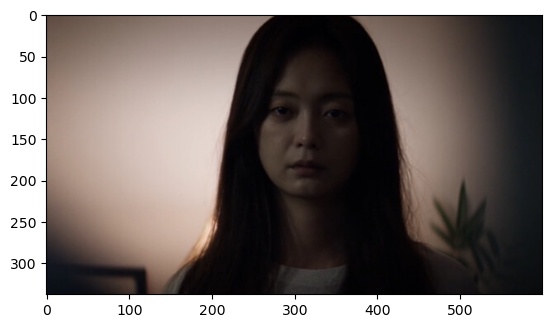

rectangles[[(244, 78) (394, 228)]]


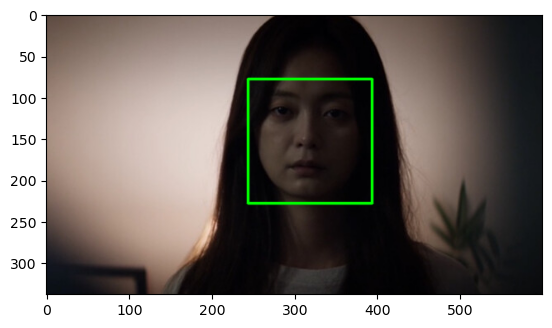

68


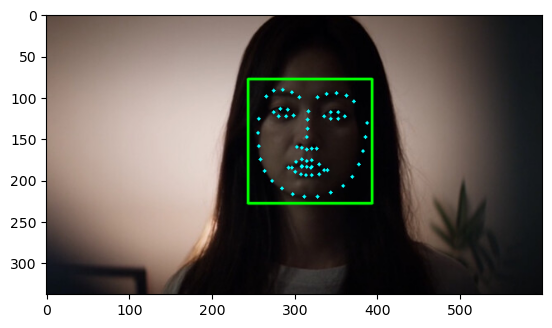

(315, 148)
(x,y) : (315,148)
(w,h) : (151,75)
(75, 151, 3)
(x,y) : (240,111)
(x,y) : (240,111)


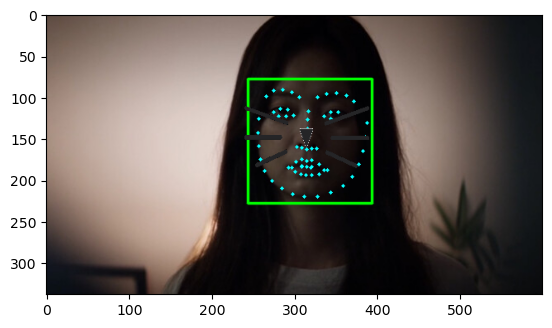

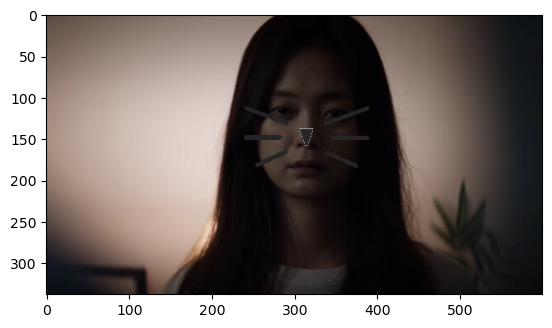

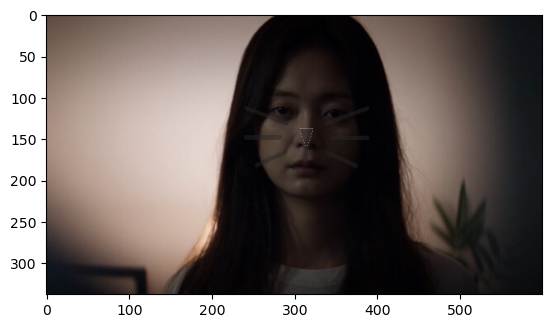

In [19]:
my_image_path = 'data\So-minJeon2.jpg'
Sticker(my_image_path)

전체적으로 어두워도 얼굴 인식은 잘 된다.

## 6.3. 누워있는 사진

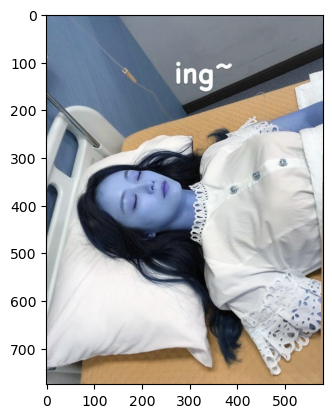

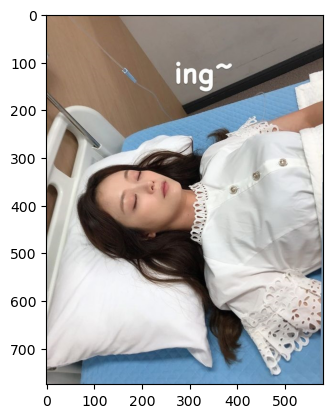

rectangles[]


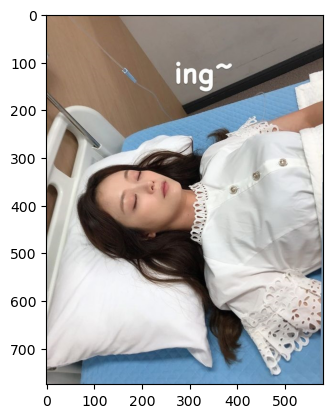

IndexError: list index out of range

In [20]:
my_image_path = 'data\So-minJeon3.jpg'
Sticker(my_image_path)

각도가 기울어진 얼굴은 인식을 잘 하지 못한다.

## 6.4. 문제점

### 6.4.1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?


각도에 띠라 스티커도 각도가 달라져야 한다. 하지만 bounding box가 이미지와 수평, 수직으로 그려졌기 때문에 조금 어색하지만  
기울어진 사각형으로 그리거나 원근법을 적용하는 법을 알면 해결할 수 있을 것 같다.

### 6.4.2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?


애초부터 사이즈가 작은 사진 + 사진 속에서도 멀리 있는 인물의 얼굴이 인식이 잘 되지 않는 모습을 보였다.  
사이즈가 큰 사진 + 사진 속에서 멀리 있는 인물은 얼굴 인식이 잘되는지는 확인하지 못했다.  
애초부터 사이즈가 작다는 건 픽셀이 부족하다는 뜻이고 그로 인해 정보가 부족하다는 것이기 때문에 잘 구분이 되지 못하는 것 같다.

옆으로 누워있는 사진은 아마도 랜드마크 기울이지 않아서 인식을 못하는 것 같다.  
이것도 랜드마크를 기울일 수 있다면 해결할 수 있을 것 같다.

### 6.4.3. 실행 속도가 중요할까요?


모델 학습은 느리더라도 predict는 빠르게 실행되야 한다.  
고객들의 시간은 금이기 때문이다.

### 6.4.4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

매우 중요하다. 그렇지 않으면 안경을 콧구멍에 씌운다던가 옷을 얼굴에 씌운다거나 하는 에러가 발생하기 때문이다.  
고객들이 그러한 앱을 사용할 리가 없다.

# 7. 회고하기

## 7.1. 이번 프로젝트에서 어려웠던 점

Exploration 6 모델 학습에 시간을 매우 쏟아서 7번을 할 시간이 부족했던 것 같다.  
그래서 어렵기 보다는 좀 더 파고들지 못해서 아쉬웠다.

## 7.2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

얼굴 인식을 할 수 있는 랜드마크 기능이 있다는 것이 신기했다.  
어떻게 동작하는지 알 수 없었던 얼굴 인식을 맛볼 수 있어서 좋았다.  

스티커의 각도 조절하는 법을 찾지 못해서 아쉬웠고 기회가 된다면  
Exploration 9번에서 별도로 한 번 추가해봐야겠다.

## 7.3. 루브릭 평가 지표를 맞추기 위해 시도한 것들

스테이지를 따라가다 보면 잘 나온 사진은 바운딩 박스랑 랜드마크를 잘 검출할 수 있었다.  

또한 좌표 계산은 y축 방향이 반대인 것만 인지하면 스티커를 붙이는데 어려움은 없었다.  

멀리서 찍은 사진, 어두운 사진, 누워 있는 사진을 이용해서 스티커앱이 잘 작동하는지 살펴보았고,  
작동하지 않았다면 무엇이 문제였는지 뇌피셜을 작성하였다.

## 7.4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정

이번에 너무 시간이 부족한 나머지 제대로 잘 못한 듯해서 루브릭 평가 관련 지표를 달성했는지 잘 모르겠지만  달성하지 못했다고 한다면 아마도 정확한 해결책을 제시하지 못하고, 또 해결하기 위한 코드들을 제시하지 않았기 때문일 것이다.

## 7.5. 회상 혹은 자기 다짐

Exploration 기간이 기본적으로 2개씩 겹치는데  
어려운 것이 연속으로 겹치면 앞에 꺼를 하느라 뒤에 꺼를 소홀히 하게 된다.  
따라서 앞으로는 하루 씩 번갈아 가면서 스테이지를 진행할 예정이다.